# Import libraries needed for the project

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns


In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
path = 'Users\\Rosco\\Desktop\SAMPLE_DATASETS\Full_Airbnb_'
path

'Users\\Rosco\\Desktop\\SAMPLE_DATASETS\\Full_Airbnb_'

# Import Dataframes for European Cities (Amsterdam, London, Paris and Rome).

In [3]:
Amsterdam = pd.read_csv("Full_Airbnb_Amsterdam.csv")
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8386 non-null   int64  
 1   listing_url                                   8386 non-null   object 
 2   scrape_id                                     8386 non-null   int64  
 3   last_scraped                                  8386 non-null   object 
 4   source                                        8386 non-null   object 
 5   name                                          8386 non-null   object 
 6   description                                   8385 non-null   object 
 7   neighborhood_overview                         5208 non-null   object 
 8   picture_url                                   8385 non-null   object 
 9   host_id                                       8386 non-null   i

In [4]:
London = pd.read_csv('Full_Airbnb_London.csv')
London.info()

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\2790182225.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  London = pd.read_csv('Full_Airbnb_London.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87946 non-null  int64  
 1   listing_url                                   87946 non-null  object 
 2   scrape_id                                     87946 non-null  int64  
 3   last_scraped                                  87946 non-null  object 
 4   source                                        87946 non-null  object 
 5   name                                          87946 non-null  object 
 6   description                                   86679 non-null  object 
 7   neighborhood_overview                         47190 non-null  object 
 8   picture_url                                   87943 non-null  object 
 9   host_id                                       87946 non-null 

In [5]:
London.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27


In [6]:
Paris = pd.read_csv('Full_Airbnb_Paris.csv')
Paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67942 entries, 0 to 67941
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67942 non-null  int64  
 1   listing_url                                   67942 non-null  object 
 2   scrape_id                                     67942 non-null  int64  
 3   last_scraped                                  67942 non-null  object 
 4   source                                        67942 non-null  object 
 5   name                                          67942 non-null  object 
 6   description                                   67416 non-null  object 
 7   neighborhood_overview                         38031 non-null  object 
 8   picture_url                                   67942 non-null  object 
 9   host_id                                       67942 non-null 

In [7]:
Rome = pd.read_csv("Full_Airbnb_Rome.csv")
Rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28014 entries, 0 to 28013
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            28014 non-null  int64  
 1   listing_url                                   28014 non-null  object 
 2   scrape_id                                     28014 non-null  int64  
 3   last_scraped                                  28014 non-null  object 
 4   source                                        28014 non-null  object 
 5   name                                          28014 non-null  object 
 6   description                                   27511 non-null  object 
 7   neighborhood_overview                         16994 non-null  object 
 8   picture_url                                   28014 non-null  object 
 9   host_id                                       28014 non-null 

# Concatenate the European Dataframes

In [8]:
Europe = pd.concat([Amsterdam, London, Paris, Rome], axis = 0, ignore_index = True)
Europe.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


# Let's get an initial overview of the datatypes, null values, types of features, etc. for the Europe Dataframe.

In [9]:
Europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192288 entries, 0 to 192287
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            192288 non-null  int64  
 1   listing_url                                   192288 non-null  object 
 2   scrape_id                                     192288 non-null  int64  
 3   last_scraped                                  192288 non-null  object 
 4   source                                        192288 non-null  object 
 5   name                                          192288 non-null  object 
 6   description                                   189991 non-null  object 
 7   neighborhood_overview                         107423 non-null  object 
 8   picture_url                                   192284 non-null  object 
 9   host_id                                       19

# Drop features that will not be used.

In [10]:
Europe_trim = Europe.drop(Europe.iloc[:, 0:30], axis = 1)


In [11]:
Europe_trim.drop(Europe_trim.iloc[:, 11:], axis = 1, inplace = True)
Europe_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192288 entries, 0 to 192287
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        192288 non-null  float64
 1   longitude       192288 non-null  float64
 2   property_type   192288 non-null  object 
 3   room_type       192288 non-null  object 
 4   accommodates    192288 non-null  int64  
 5   bathrooms       0 non-null       float64
 6   bathrooms_text  192056 non-null  object 
 7   bedrooms        135746 non-null  float64
 8   beds            190093 non-null  float64
 9   amenities       192288 non-null  object 
 10  price           192288 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 16.1+ MB


In [12]:
Europe_trim.drop(Europe_trim.iloc[:, [5]], axis = 1, inplace = True)

In [13]:
Europe_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192288 entries, 0 to 192287
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        192288 non-null  float64
 1   longitude       192288 non-null  float64
 2   property_type   192288 non-null  object 
 3   room_type       192288 non-null  object 
 4   accommodates    192288 non-null  int64  
 5   bathrooms_text  192056 non-null  object 
 6   bedrooms        135746 non-null  float64
 7   beds            190093 non-null  float64
 8   amenities       192288 non-null  object 
 9   price           192288 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ MB


# Drop null values from 'bathrooms_text' and 'beds' since they amount to less than 3% of the data.

In [14]:
Europe_trim_drop_bath = Europe_trim.dropna(subset = ['bathrooms_text'])
Europe_trim_drop_bath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192056 entries, 0 to 192287
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        192056 non-null  float64
 1   longitude       192056 non-null  float64
 2   property_type   192056 non-null  object 
 3   room_type       192056 non-null  object 
 4   accommodates    192056 non-null  int64  
 5   bathrooms_text  192056 non-null  object 
 6   bedrooms        135593 non-null  float64
 7   beds            189898 non-null  float64
 8   amenities       192056 non-null  object 
 9   price           192056 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 16.1+ MB


In [15]:
Europe_trim_drop_bath_beds = Europe_trim_drop_bath.dropna(subset = ['beds'])
Europe_trim_drop_bath_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189898 entries, 0 to 192287
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        189898 non-null  float64
 1   longitude       189898 non-null  float64
 2   property_type   189898 non-null  object 
 3   room_type       189898 non-null  object 
 4   accommodates    189898 non-null  int64  
 5   bathrooms_text  189898 non-null  object 
 6   bedrooms        134557 non-null  float64
 7   beds            189898 non-null  float64
 8   amenities       189898 non-null  object 
 9   price           189898 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 15.9+ MB


# Check the 'bathrooms' Series to determine what data needs to be cleaned.

In [16]:
Europe_trim_drop_bath_beds.bathrooms_text.value_counts()

1 bath               108090
2 baths               19438
1 shared bath         16985
1 private bath        14921
1.5 baths             13910
1.5 shared baths       4112
2.5 baths              3854
3 baths                2851
2 shared baths         1544
3.5 baths               938
Half-bath               608
4 baths                 591
2.5 shared baths        419
0 baths                 260
3 shared baths          239
4.5 baths               209
5 baths                 203
0 shared baths          172
Shared half-bath        146
6 baths                  80
5.5 baths                53
3.5 shared baths         43
Private half-bath        42
7 baths                  26
6.5 baths                26
4 shared baths           19
4.5 shared baths         15
8 baths                  13
12 baths                 13
7.5 baths                13
5 shared baths           10
6 shared baths            6
9 baths                   6
5.5 shared baths          5
48 baths                  5
12.5 baths          

# Remove wording and non-letter characters in 'bathroom_text' and change the datatype to 'float'

In [17]:
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('baths', '')
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('shared', '')
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('Private', '')
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('private', '')
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('bath', '')
Europe_trim_drop_bath_beds['bathrooms_text'].value_counts()

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\3042071078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('baths', '')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\3042071078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('shared', '')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\3

1               108090
1                31906
2                19438
1.5              13910
1.5               4112
2.5               3854
3                 2851
2                 1544
3.5                938
Half-              608
4                  591
2.5                419
0                  260
3                  239
4.5                209
5                  203
0                  172
Shared half-       146
6                   80
5.5                 53
3.5                 43
 half-              42
7                   26
6.5                 26
4                   19
4.5                 15
8                   13
12                  13
7.5                 13
5                   10
6                    6
9                    6
5.5                  5
48                   5
12.5                 4
10                   4
23                   3
17                   3
49                   2
9.5                  2
16                   2
8.5                  2
10.5                 2
7          

In [18]:
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('Half-', '.5')
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('half-', '.5')
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('Shared half-', '.5')
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.strip(" ")
Europe_trim_drop_bath_beds['bathrooms_text'].value_counts()

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\4237482617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('Half-', '.5')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\4237482617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('half-', '.5')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_2998

1            139996
2             20982
1.5           18022
2.5            4273
3              3090
3.5             981
.5              650
4               610
0               432
4.5             224
5               213
Shared .5       146
6                86
5.5              58
7                28
6.5              26
8                14
12               13
7.5              13
9                 6
10                5
48                5
12.5              4
17                3
23                3
10.5              2
13                2
16                2
8.5               2
9.5               2
49                2
16.5              1
22                1
47                1
Name: bathrooms_text, dtype: int64

In [19]:
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('Shared ', '')
Europe_trim_drop_bath_beds['bathrooms_text'].value_counts()

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\3470121884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].str.replace('Shared ', '')


1       139996
2        20982
1.5      18022
2.5       4273
3         3090
3.5        981
.5         796
4          610
0          432
4.5        224
5          213
6           86
5.5         58
7           28
6.5         26
8           14
12          13
7.5         13
9            6
10           5
48           5
12.5         4
17           3
23           3
10.5         2
13           2
16           2
8.5          2
9.5          2
49           2
16.5         1
22           1
47           1
Name: bathrooms_text, dtype: int64

In [20]:
Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].astype(float)

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\3749854274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['bathrooms_text'] = Europe_trim_drop_bath_beds['bathrooms_text'].astype(float)


# Clean the 'price' column and change to 'float'

In [21]:
Europe_trim_drop_bath_beds['price'] = Europe_trim_drop_bath_beds['price'].str.replace('$', '')
Europe_trim_drop_bath_beds['price'] = Europe_trim_drop_bath_beds['price'].str.replace(',', '').astype(float)


C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\1829238514.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Europe_trim_drop_bath_beds['price'] = Europe_trim_drop_bath_beds['price'].str.replace('$', '')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\1829238514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['price'] = Europe_trim_drop_bath_beds['price'].str.replace('$', '')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\1829238514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [22]:
Europe_trim_drop_bath_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189898 entries, 0 to 192287
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        189898 non-null  float64
 1   longitude       189898 non-null  float64
 2   property_type   189898 non-null  object 
 3   room_type       189898 non-null  object 
 4   accommodates    189898 non-null  int64  
 5   bathrooms_text  189898 non-null  float64
 6   bedrooms        134557 non-null  float64
 7   beds            189898 non-null  float64
 8   amenities       189898 non-null  object 
 9   price           189898 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 15.9+ MB


# Impute the null values in the 'bedrooms' column with the median number of bedrooms since dropping the rows with null values would throw away too many observations.

In [23]:
Europe_trim_drop_bath_beds['bedrooms'] = Europe_trim_drop_bath_beds['bedrooms'].fillna(Europe_trim_drop_bath_beds['bedrooms'].median())
Europe_trim_drop_bath_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189898 entries, 0 to 192287
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        189898 non-null  float64
 1   longitude       189898 non-null  float64
 2   property_type   189898 non-null  object 
 3   room_type       189898 non-null  object 
 4   accommodates    189898 non-null  int64  
 5   bathrooms_text  189898 non-null  float64
 6   bedrooms        189898 non-null  float64
 7   beds            189898 non-null  float64
 8   amenities       189898 non-null  object 
 9   price           189898 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 15.9+ MB


C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\2765811505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['bedrooms'] = Europe_trim_drop_bath_beds['bedrooms'].fillna(Europe_trim_drop_bath_beds['bedrooms'].median())


# Prepare to drop remaining features that were created during investigation of the data.

In [24]:
Europe_trim_drop_bath_beds.drop(Europe_trim_drop_bath_beds.iloc[:, [8]], axis = 1, inplace = True)

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\494666486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds.drop(Europe_trim_drop_bath_beds.iloc[:, [8]], axis = 1, inplace = True)


In [25]:
Europe_trim_drop_bath_beds.drop(Europe_trim_drop_bath_beds.iloc[:, 9:], axis = 1, inplace = True)
Europe_trim_drop_bath_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189898 entries, 0 to 192287
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        189898 non-null  float64
 1   longitude       189898 non-null  float64
 2   property_type   189898 non-null  object 
 3   room_type       189898 non-null  object 
 4   accommodates    189898 non-null  int64  
 5   bathrooms_text  189898 non-null  float64
 6   bedrooms        189898 non-null  float64
 7   beds            189898 non-null  float64
 8   price           189898 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 14.5+ MB


C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\1773686891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds.drop(Europe_trim_drop_bath_beds.iloc[:, 9:], axis = 1, inplace = True)


In [138]:
Europe_trim_drop_bath_beds['property_type'] = Europe_trim_drop_bath_beds['property_type'].str.replace('[^a-zA-Z]', '')

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\2225154985.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Europe_trim_drop_bath_beds['property_type'] = Europe_trim_drop_bath_beds['property_type'].str.replace('[^a-zA-Z]', '')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\2225154985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['property_type'] = Europe_trim_drop_bath_beds['property_type'].str.replace('[^a-zA-Z]', '')


### There are many different property types in this data set.  I will look at the top 13 property types and group the rest of them as 'other'.  Then I will use one-hot encoding (get_dummies) on the 'property type' feature.  Finally I will drop the original columns used to do the one-hot encoding.

In [140]:
Europe_trim_drop_bath_beds['property_type'].value_counts().head(13)

Entirerentalunit                103403
Privateroominrentalunit          23017
Entirecondo                      16912
Privateroominhome                11016
Entirehome                        9368
Privateroomincondo                4844
Privateroominbedandbreakfast      2950
Entireservicedapartment           2611
Entireloft                        2048
Roominboutiquehotel               1858
Roominhotel                       1747
Entiretownhouse                   1602
Privateroomintownhouse            1492
Name: property_type, dtype: int64

In [27]:
top_13_property_types_Eu = ["Entire rental unit", "Private room in rental unit", "Entire condo", "Private room in home", "Entire home",
                           "Private room in condo", "Private room in bed and breakfast", "Entire serviced apartment", "Entire loft", 
                           "Room in boutique hotel", "Room in hotel", "Entire townhouse", "Private room in townhouse"]

Europe_trim_drop_bath_beds['property_type_cleaned'] = Europe_trim_drop_bath_beds['property_type'].apply([lambda x: x if x in top_13_property_types_Eu else "other"])

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\1277008820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Europe_trim_drop_bath_beds['property_type_cleaned'] = Europe_trim_drop_bath_beds['property_type'].apply([lambda x: x if x in top_13_property_types_Eu else "other"])


# Perform the get_dummies step to one-hot encode the property types.

In [28]:
property_encode1 = pd.get_dummies(Europe_trim_drop_bath_beds['property_type_cleaned'], drop_first = True, dtype = int)
property_encode1

,Entire home,Entire loft,Entire rental unit,Entire serviced apartment,Entire townhouse,Private room in bed and breakfast,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in boutique hotel,Room in hotel,other
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192283,0,0,1,0,0,0,0,0,0,0,0,0,0
192284,0,0,1,0,0,0,0,0,0,0,0,0,0
192285,0,0,0,0,0,0,0,0,0,0,0,0,0
192286,0,0,0,0,0,0,0,0,0,0,0,0,0


# Now to join the encoded dataframe with the rest of the data, and then drop the original 'property_type_cleaned' and 'property_type' features.

In [124]:
Europe_final = pd.concat([Europe_trim_drop_bath_beds, property_encode1], axis = 1)
Europe_final.head()

,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,property_type_cleaned,...,Entire serviced apartment,Entire townhouse,Private room in bed and breakfast,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in boutique hotel,Room in hotel,other
0,52.40164,4.95106,Private room in condo,Private room,1,1.0,1.0,1.0,61.0,Private room in condo,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52.38855,4.88521,Entire rental unit,Entire home/apt,2,2.0,1.0,1.0,327.0,Entire rental unit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.37824,4.86826,Private room in boat,Private room,2,1.5,1.0,1.0,109.0,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,52.34091,4.84802,Houseboat,Entire home/apt,4,2.5,3.0,3.0,290.0,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,52.37641,4.88303,Private room in rental unit,Private room,2,1.0,1.0,1.0,150.0,Private room in rental unit,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [125]:
Europe_final = Europe_final.drop(columns = ['property_type', 'property_type_cleaned'])
Europe_final

,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,Entire home,Entire loft,...,Entire serviced apartment,Entire townhouse,Private room in bed and breakfast,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in boutique hotel,Room in hotel,other
0,52.401640,4.951060,Private room,1,1.0,1.0,1.0,61.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52.388550,4.885210,Entire home/apt,2,2.0,1.0,1.0,327.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.378240,4.868260,Private room,2,1.5,1.0,1.0,109.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,52.340910,4.848020,Entire home/apt,4,2.5,3.0,3.0,290.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,52.376410,4.883030,Private room,2,1.0,1.0,1.0,150.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192283,41.728131,12.279367,Entire home/apt,4,3.0,2.0,2.0,200.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192284,41.896810,12.473450,Entire home/apt,4,1.0,1.0,2.0,320.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192285,41.895201,12.450072,Entire home/apt,6,1.0,1.0,4.0,155.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192286,41.929890,12.461880,Entire home/apt,2,1.0,1.0,1.0,64.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Finally I will do the same process to the 'room_type' feature.

In [151]:
room_encode1 = pd.get_dummies(Europe_trim_drop_bath_beds['room_type'], drop_first = True, dtype = int)

In [152]:
Europe_final = pd.concat([Europe_final, room_encode1], axis = 1)
Europe_final = Europe_final.drop(columns = ['room_type'])

In [153]:
Europe_final.head()

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,Entire home,Entire loft,Entire rental unit,...,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in boutique hotel,Room in hotel,other,Hotel room,Private room,Shared room
0,52.40164,4.95106,1,1.0,1.0,1.0,61.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,52.38855,4.88521,2,2.0,1.0,1.0,327.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,52.37824,4.86826,2,1.5,1.0,1.0,109.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0
3,52.34091,4.84802,4,2.5,3.0,3.0,290.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
4,52.37641,4.88303,2,1.0,1.0,1.0,150.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0


In [156]:
Europe_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189898 entries, 0 to 192287
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   latitude                           189898 non-null  float64
 1   longitude                          189898 non-null  float64
 2   accommodates                       189898 non-null  int64  
 3   bathrooms_text                     189898 non-null  float64
 4   bedrooms                           189898 non-null  float64
 5   beds                               189898 non-null  float64
 6   price                              189898 non-null  float64
 7   Entire home                        189898 non-null  float64
 8   Entire loft                        189898 non-null  float64
 9   Entire rental unit                 189898 non-null  float64
 10  Entire serviced apartment          189898 non-null  float64
 11  Entire townhouse                   1898

### To get a statistical feel of the data I will look at the mean values, standard deviations, the max and the min values.

In [157]:
Europe_final.describe()

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,Entire home,Entire loft,Entire rental unit,...,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in boutique hotel,Room in hotel,other,Hotel room,Private room,Shared room
count,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,...,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000,189898.000000
mean,49.209007,2.804423,3.210397,1.262088,1.435871,1.838050,196.619949,0.049332,0.010785,0.544519,...,0.025508,0.058010,0.121207,0.007857,0.009784,0.009200,0.037020,0.007609,0.258260,0.004945
std,3.271772,4.224884,1.857927,0.664745,0.899488,1.330951,531.389223,0.216560,0.103288,0.498015,...,0.157664,0.233763,0.326369,0.088290,0.098430,0.095473,0.188811,0.086899,0.437679,0.070145
min,41.656792,-0.497800,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.853720,-0.116610,2.000000,1.000000,1.000000,1.000000,75.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.338775,2.297789,2.000000,1.000000,1.000000,1.000000,124.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.517270,2.377808,4.000000,1.500000,2.000000,2.000000,203.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,52.425159,12.823320,16.000000,49.000000,50.000000,90.000000,90963.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# At this point I want to scale the data to prepare it for use in the models I will build.

In [158]:
scaler = StandardScaler().fit(Europe_final)
Europe_final_scaled = scaler.transform(Europe_final)

In [161]:
Europe_final_scaled = pd.DataFrame(Europe_final_scaled, columns = Europe_final.columns)

### Now I want to determine how the features correlate with each other.  For this I will apply the corr() function to the data and then use that as input to the heatmap function.

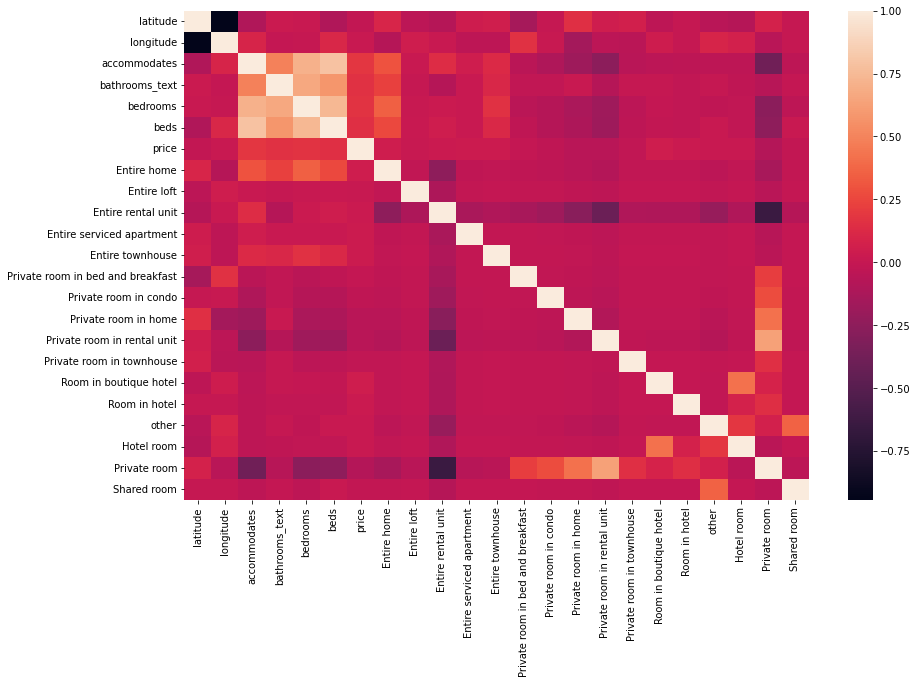

In [197]:
dims = (14, 9)
fig, ax = pyplot.subplots(figsize = dims)
sns.heatmap(Europe_final_scaled.corr(), ax = ax, xticklabels = True, yticklabels = True)
plt.show()

### I will also look individually at each pair of features to help determine any correlation.

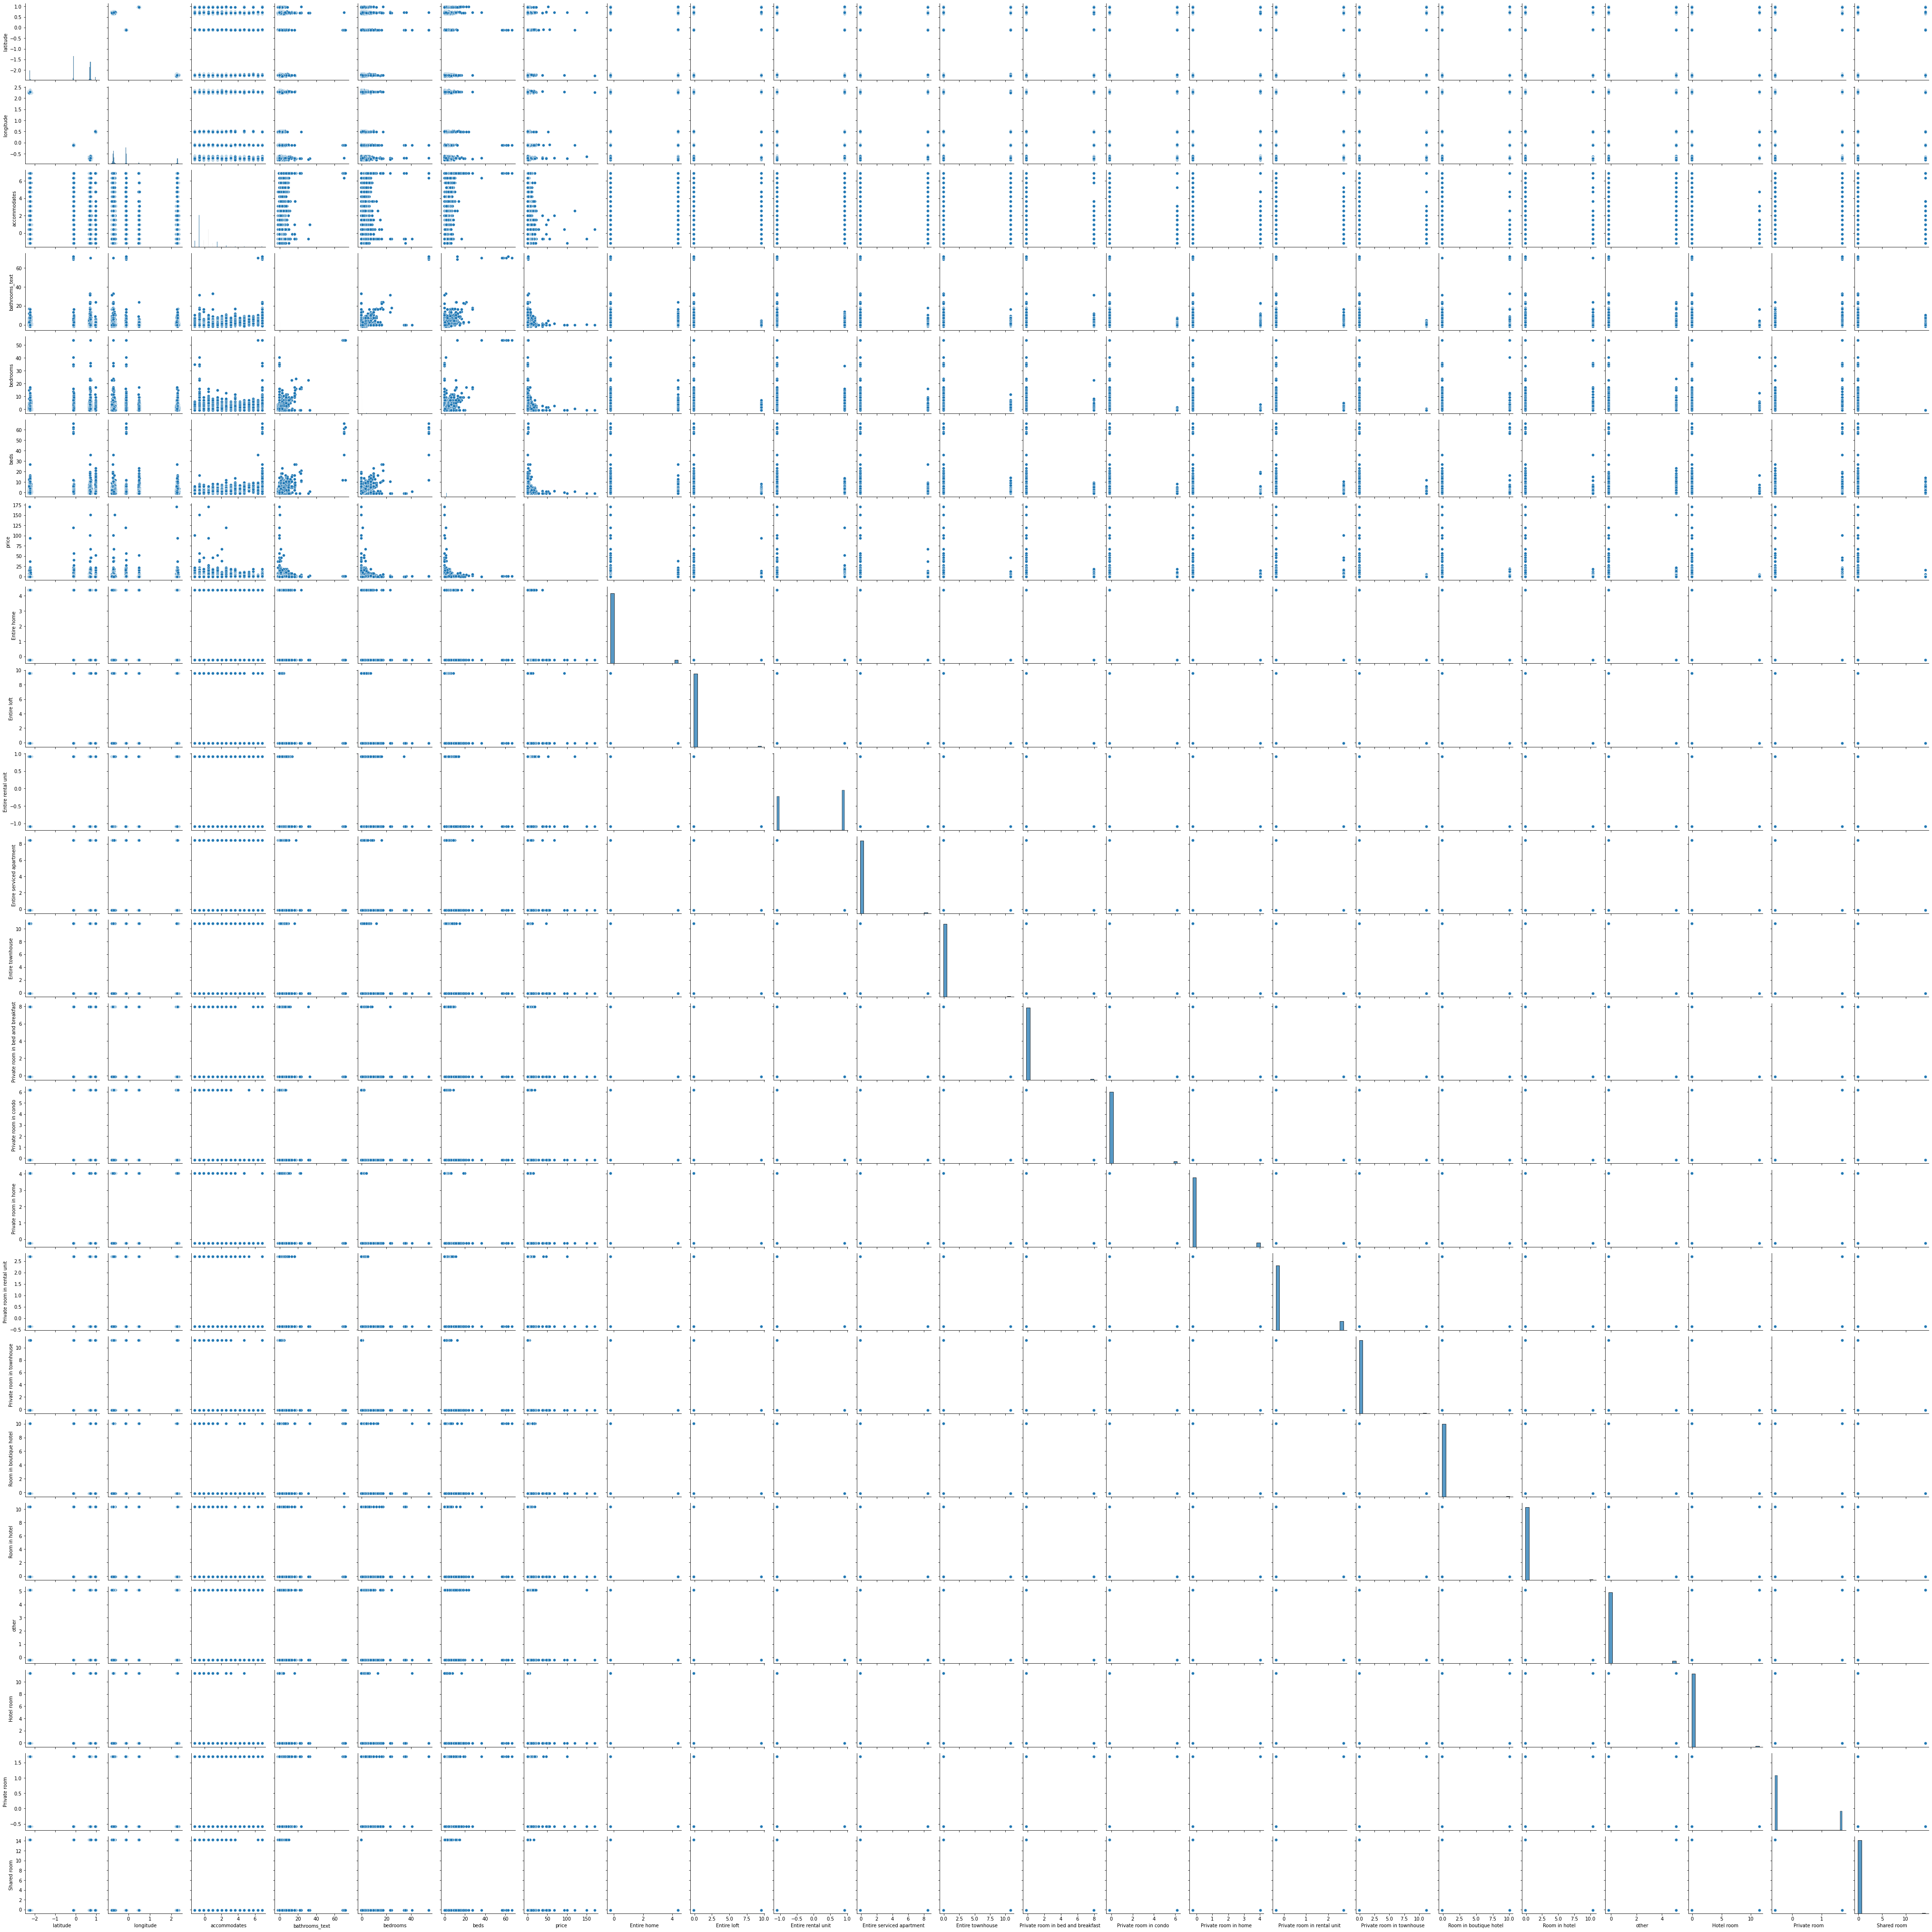

In [164]:
sns.pairplot(Europe_final_scaled)
plt.show()

### I also want to determine if any of the features have a large number of outliers so I will use create a boxplot for all the features.

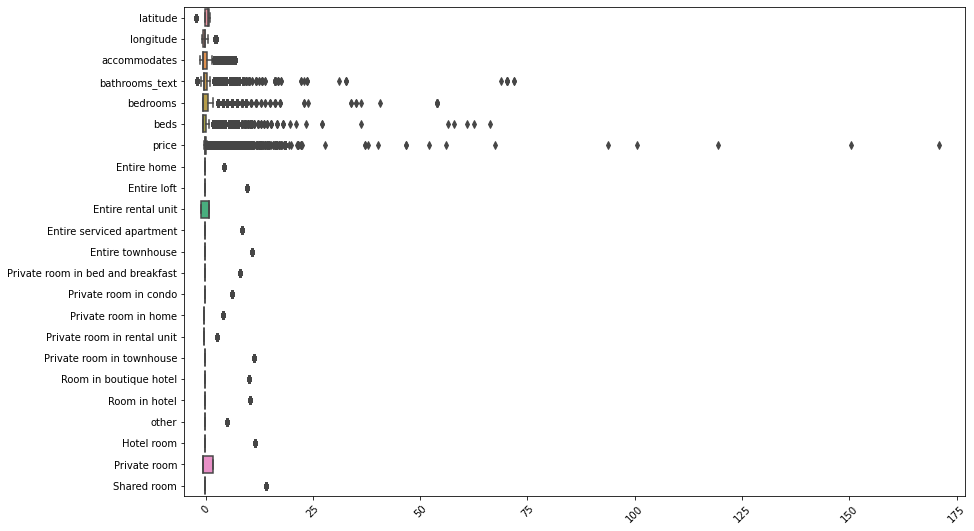

In [185]:
dims = (14, 9)
fig, ax = pyplot.subplots(figsize = dims)
sns.boxplot(data = Europe_final_scaled, ax = ax, orient = 'h', width = .8) 
plt.xticks(rotation = 90)


ax.set_xlim(-5, 177)

plt.xticks(rotation = 45)

plt.show()

# Now to prepare the data for testing different.  I will create a training set of data and a testing set of data using the train_test_split tool.

In [191]:
X_Eu = Europe_final_scaled.drop(columns = ['price'])
y_Eu = Europe_final_scaled['price']

In [192]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_Eu, y_Eu, test_size = .30, random_state = 50)

# Import Dataframes for U.S. cities (Dallas, Denver, Los Angeles and New York City)

In [45]:
Dallas = pd.read_csv("Full_Airbnb_Dallas.csv")
Dallas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5627 entries, 0 to 5626
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5627 non-null   int64  
 1   listing_url                                   5627 non-null   object 
 2   scrape_id                                     5627 non-null   int64  
 3   last_scraped                                  5627 non-null   object 
 4   source                                        5627 non-null   object 
 5   name                                          5627 non-null   object 
 6   description                                   5582 non-null   object 
 7   neighborhood_overview                         3325 non-null   object 
 8   picture_url                                   5627 non-null   object 
 9   host_id                                       5627 non-null   i

In [46]:
Denver = pd.read_csv("Full_Airbnb_Denver.csv")
Denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5388 entries, 0 to 5387
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5388 non-null   int64  
 1   listing_url                                   5388 non-null   object 
 2   scrape_id                                     5388 non-null   int64  
 3   last_scraped                                  5388 non-null   object 
 4   source                                        5388 non-null   object 
 5   name                                          5388 non-null   object 
 6   description                                   5369 non-null   object 
 7   neighborhood_overview                         3813 non-null   object 
 8   picture_url                                   5388 non-null   object 
 9   host_id                                       5388 non-null   i

In [47]:
LosAngeles = pd.read_csv('Full_Airbnb_LosAngeles.csv')
LosAngeles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44594 entries, 0 to 44593
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            44594 non-null  int64  
 1   listing_url                                   44594 non-null  object 
 2   scrape_id                                     44594 non-null  int64  
 3   last_scraped                                  44594 non-null  object 
 4   source                                        44594 non-null  object 
 5   name                                          44594 non-null  object 
 6   description                                   43937 non-null  object 
 7   neighborhood_overview                         25053 non-null  object 
 8   picture_url                                   44594 non-null  object 
 9   host_id                                       44594 non-null 

In [48]:
NewYorkCity = pd.read_csv('Full_Airbnb_NewYorkCity.csv')
NewYorkCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38792 non-null  int64  
 1   listing_url                                   38792 non-null  object 
 2   scrape_id                                     38792 non-null  int64  
 3   last_scraped                                  38792 non-null  object 
 4   source                                        38792 non-null  object 
 5   name                                          38792 non-null  object 
 6   description                                   38223 non-null  object 
 7   neighborhood_overview                         22556 non-null  object 
 8   picture_url                                   38792 non-null  object 
 9   host_id                                       38792 non-null 

# Concatenate the U.S. Dataframes

In [49]:
US = pd.concat([Dallas, Denver, LosAngeles, NewYorkCity], axis = 0, ignore_index = True)
US.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,61878,https://www.airbnb.com/rooms/61878,20230912032450,2023-09-12,city scrape,Condo in Dallas · ★4.75 · 1 bedroom · 2 beds ·...,Close to downtown and Uptown. Fast and conven...,Enjoy the heart of Dallas right out your door ...,https://a0.muscache.com/pictures/c4d9625e-bcc5...,300211,...,4.94,4.78,4.80,NaN,f,1,1,0,0,0.34
1,776810,https://www.airbnb.com/rooms/776810,20230912032450,2023-09-12,city scrape,Loft in Dallas · ★4.90 · 1 bedroom · 1 bed · 1...,<b>The space</b><br />Amazing and Colorful 2-...,15 min walk to downtown Dallas and American Ai...,https://a0.muscache.com/pictures/9201ddbc-b015...,4096626,...,4.96,5.00,4.78,NaN,f,1,1,0,0,0.22
2,795703,https://www.airbnb.com/rooms/795703,20230912032450,2023-09-12,city scrape,Condo in Dallas · ★4.84 · 1 bedroom · 1 bed · ...,***** Over 30% Discounts for stays over 30 day...,Located in Turtle Creek neighborhood steps fro...,https://a0.muscache.com/pictures/miso/Hosting-...,4191322,...,4.97,4.91,4.75,NaN,f,1,1,0,0,0.54
3,826118,https://www.airbnb.com/rooms/826118,20230912032450,2023-09-12,city scrape,Home in Dallas · ★4.83 · 1 bedroom · 1 bed · 1...,<b>The space</b><br />Second-floor bedroom wit...,NaN,https://a0.muscache.com/pictures/96902813/2eab...,804559,...,4.83,4.78,4.78,NaN,f,3,0,3,0,0.24
4,826178,https://www.airbnb.com/rooms/826178,20230912032450,2023-09-12,city scrape,Home in Dallas · ★5.0 · 1 bedroom · 2 beds · 1...,Orange Room contains a bathroom suite with toi...,Near UTD in Far North Dallas .,https://a0.muscache.com/pictures/96729051/924e...,804559,...,5.00,5.00,5.00,NaN,f,3,0,3,0,0.19


# Drop features that will not be used in the project

In [50]:
US_trim = US.drop(US.iloc[:, 0:30], axis = 1)
US_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94401 entries, 0 to 94400
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   latitude                                      94401 non-null  float64
 1   longitude                                     94401 non-null  float64
 2   property_type                                 94401 non-null  object 
 3   room_type                                     94401 non-null  object 
 4   accommodates                                  94401 non-null  int64  
 5   bathrooms                                     0 non-null      float64
 6   bathrooms_text                                94331 non-null  object 
 7   bedrooms                                      62410 non-null  float64
 8   beds                                          93157 non-null  float64
 9   amenities                                     94401 non-null 

In [51]:
US_trim.drop(US_trim.iloc[:, [9]], axis = 1, inplace = True)
US_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94401 entries, 0 to 94400
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   latitude                                      94401 non-null  float64
 1   longitude                                     94401 non-null  float64
 2   property_type                                 94401 non-null  object 
 3   room_type                                     94401 non-null  object 
 4   accommodates                                  94401 non-null  int64  
 5   bathrooms                                     0 non-null      float64
 6   bathrooms_text                                94331 non-null  object 
 7   bedrooms                                      62410 non-null  float64
 8   beds                                          93157 non-null  float64
 9   price                                         94401 non-null 

In [52]:
US_trim.drop(US_trim.iloc[:, 10:], axis = 1, inplace = True)
US_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94401 entries, 0 to 94400
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        94401 non-null  float64
 1   longitude       94401 non-null  float64
 2   property_type   94401 non-null  object 
 3   room_type       94401 non-null  object 
 4   accommodates    94401 non-null  int64  
 5   bathrooms       0 non-null      float64
 6   bathrooms_text  94331 non-null  object 
 7   bedrooms        62410 non-null  float64
 8   beds            93157 non-null  float64
 9   price           94401 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 7.2+ MB


In [53]:
US_trim.drop(US_trim.iloc[:, [5]], axis = 1, inplace = True)
US_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94401 entries, 0 to 94400
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        94401 non-null  float64
 1   longitude       94401 non-null  float64
 2   property_type   94401 non-null  object 
 3   room_type       94401 non-null  object 
 4   accommodates    94401 non-null  int64  
 5   bathrooms_text  94331 non-null  object 
 6   bedrooms        62410 non-null  float64
 7   beds            93157 non-null  float64
 8   price           94401 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 6.5+ MB


# Drop null values from the 'bathrooms_text' and 'beds' columns since they are less than 3% of the data.

In [54]:
US_trim_drop_bath = US_trim.dropna(subset = ['bathrooms_text'])
US_trim_drop_bath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94331 entries, 0 to 94400
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        94331 non-null  float64
 1   longitude       94331 non-null  float64
 2   property_type   94331 non-null  object 
 3   room_type       94331 non-null  object 
 4   accommodates    94331 non-null  int64  
 5   bathrooms_text  94331 non-null  object 
 6   bedrooms        62368 non-null  float64
 7   beds            93105 non-null  float64
 8   price           94331 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 7.2+ MB


In [55]:
US_trim_drop_bath_beds = US_trim_drop_bath.dropna(subset = ['beds'])
US_trim_drop_bath_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93105 entries, 0 to 94400
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        93105 non-null  float64
 1   longitude       93105 non-null  float64
 2   property_type   93105 non-null  object 
 3   room_type       93105 non-null  object 
 4   accommodates    93105 non-null  int64  
 5   bathrooms_text  93105 non-null  object 
 6   bedrooms        61953 non-null  float64
 7   beds            93105 non-null  float64
 8   price           93105 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 7.1+ MB


# Prepare to clean the 'bathrooms_text' column and change the type to 'float'

In [56]:
US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('baths','')
US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('bath','')
US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('private','')
US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('shared','')
US_trim_drop_bath_beds['bathrooms_text'].value_counts()


C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\3926375943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('baths','')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\3926375943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('bath','')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\3926375943.py:3: Sett

1         45424
1         19211
2         11929
1.5        3064
2.5        2783
          ...  
17            1
14            1
11.5          1
24            1
15.5          1
Name: bathrooms_text, Length: 61, dtype: int64

In [57]:
US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('Half-','.5')
US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('Shared half-','.5')
US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('Private half-','.5')
US_trim_drop_bath_beds['bathrooms_text'].value_counts()

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\594915278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('Half-','.5')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\594915278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.replace('Shared half-','.5')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\594915278.p

1         45424
1         19211
2         11929
1.5        3064
2.5        2783
3          2543
2          1694
1.5        1300
3.5        1146
4           878
4.5         558
0           520
5.5         273
5           254
.5          224
3           223
0           214
2.5         180
6           141
6.5          84
7            72
8            66
4            49
3.5          39
7.5          34
11           28
9            25
8.5          25
8            22
10           21
5            10
11            8
6             7
12            6
10.5          6
9.5           6
11.5          4
4.5           4
13.5          3
5.5           3
13            3
7             2
17            2
15            2
25            1
12.5          1
36            1
21            1
10            1
17            1
16            1
14            1
24            1
11.5          1
8.5           1
27            1
14            1
12            1
15.5          1
Name: bathrooms_text, dtype: int64

In [58]:
US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.strip(" ")
US_trim_drop_bath_beds['bathrooms_text'].value_counts()

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\4110179251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].str.strip(" ")


1       64635
2       13623
1.5      4364
2.5      2963
3        2766
3.5      1185
4         927
0         734
4.5       562
5.5       276
5         264
.5        224
6         148
8          88
6.5        84
7          74
11         36
7.5        34
8.5        26
9          25
10         22
12          7
9.5         6
10.5        6
11.5        5
17          3
13.5        3
13          3
14          2
15          2
36          1
25          1
12.5        1
24          1
21          1
16          1
27          1
15.5        1
Name: bathrooms_text, dtype: int64

In [59]:
US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].astype(float)
US_trim_drop_bath_beds['bathrooms_text']*10

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\1467418039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['bathrooms_text'] = US_trim_drop_bath_beds['bathrooms_text'].astype(float)


0        10.0
1        15.0
2        10.0
3        10.0
4        10.0
         ... 
94396    10.0
94397    10.0
94398    10.0
94399    10.0
94400    10.0
Name: bathrooms_text, Length: 93105, dtype: float64

In [60]:
US_trim_drop_bath_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93105 entries, 0 to 94400
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        93105 non-null  float64
 1   longitude       93105 non-null  float64
 2   property_type   93105 non-null  object 
 3   room_type       93105 non-null  object 
 4   accommodates    93105 non-null  int64  
 5   bathrooms_text  93105 non-null  float64
 6   bedrooms        61953 non-null  float64
 7   beds            93105 non-null  float64
 8   price           93105 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 7.1+ MB


# Prepare to clean the 'price' column and change the datatype to 'float'

In [61]:
US_trim_drop_bath_beds['price'] = US_trim_drop_bath_beds['price'].str.replace('$','')

C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\2869778863.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  US_trim_drop_bath_beds['price'] = US_trim_drop_bath_beds['price'].str.replace('$','')
C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\2869778863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['price'] = US_trim_drop_bath_beds['price'].str.replace('$','')


In [62]:
US_trim_drop_bath_beds['price'].value_counts()

150.00      2535
100.00      1859
120.00      1716
200.00      1506
80.00       1326
            ... 
2,179.00       1
2,084.00       1
1,976.00       1
2,193.00       1
4,745.00       1
Name: price, Length: 1822, dtype: int64

In [63]:
US_trim_drop_bath_beds['price'] = US_trim_drop_bath_beds['price'].str.replace(',','').astype(float)
US_trim_drop_bath_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93105 entries, 0 to 94400
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        93105 non-null  float64
 1   longitude       93105 non-null  float64
 2   property_type   93105 non-null  object 
 3   room_type       93105 non-null  object 
 4   accommodates    93105 non-null  int64  
 5   bathrooms_text  93105 non-null  float64
 6   bedrooms        61953 non-null  float64
 7   beds            93105 non-null  float64
 8   price           93105 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 7.1+ MB


C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\2386814136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['price'] = US_trim_drop_bath_beds['price'].str.replace(',','').astype(float)


# Impute the null values in the 'bedrooms' column with the median number of bedrooms since dropping the rows with null values would throw away too many observations.

In [64]:
US_trim_drop_bath_beds['bedrooms'] = US_trim_drop_bath_beds['bedrooms'].fillna(US_trim_drop_bath_beds['bedrooms'].median())
US_trim_drop_bath_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93105 entries, 0 to 94400
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        93105 non-null  float64
 1   longitude       93105 non-null  float64
 2   property_type   93105 non-null  object 
 3   room_type       93105 non-null  object 
 4   accommodates    93105 non-null  int64  
 5   bathrooms_text  93105 non-null  float64
 6   bedrooms        93105 non-null  float64
 7   beds            93105 non-null  float64
 8   price           93105 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 7.1+ MB


C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\2183343779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['bedrooms'] = US_trim_drop_bath_beds['bedrooms'].fillna(US_trim_drop_bath_beds['bedrooms'].median())


### There are many different property types in this data set.  I will look at the top 13 property types and group the rest of them as 'other'.  Then I will use one-hot encoding (get_dummies) on the 'property type' feature.   Finally I will drop the original columns used to do the one-hot encoding.

In [65]:
US_trim_drop_bath_beds['property_type'].value_counts().head(13)

Entire rental unit             31067
Entire home                    15653
Private room in rental unit    12519
Private room in home            8618
Entire condo                    4035
Entire guesthouse               2999
Entire guest suite              2133
Entire townhouse                1980
Private room in townhouse       1752
Room in hotel                   1597
Entire serviced apartment       1243
Private room in condo           1153
Entire loft                     1151
Name: property_type, dtype: int64

In [66]:
top_13_property_types = ["Entire rental unit", "Entire home", "Private room in rental unit", "Private room in home", "Entire condo",
                        "Entire guesthouse", "Entire guest suite", "Entire townhouse", "Private room in townhouse", "Room in hotel",
                        "Entire serviced apartment", "Private room in condo", "Entire loft"]

US_trim_drop_bath_beds['property_type_cleaned'] = US_trim_drop_bath_beds['property_type'].apply([lambda x: x if x in top_13_property_types else "other"])



C:\Users\Rosco\AppData\Local\Temp\ipykernel_29988\2745215407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_trim_drop_bath_beds['property_type_cleaned'] = US_trim_drop_bath_beds['property_type'].apply([lambda x: x if x in top_13_property_types else "other"])


In [67]:
property_encode = pd.get_dummies(US_trim_drop_bath_beds['property_type_cleaned'], drop_first = True, dtype = int)
property_encode

,Entire guest suite,Entire guesthouse,Entire home,Entire loft,Entire rental unit,Entire serviced apartment,Entire townhouse,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in hotel,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94396,0,0,0,0,0,0,0,0,0,1,0,0,0
94397,0,0,0,0,0,0,0,0,0,1,0,0,0
94398,0,0,0,0,0,0,0,0,0,1,0,0,0
94399,0,0,0,0,1,0,0,0,0,0,0,0,0


In [68]:
US_final = pd.concat([US_trim_drop_bath_beds, property_encode], axis = 1)
US_final.head()

,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,property_type_cleaned,...,Entire loft,Entire rental unit,Entire serviced apartment,Entire townhouse,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in hotel,other
0,32.81690,-96.82018,Entire condo,Entire home/apt,3,1.0,1.0,2.0,85.0,Entire condo,...,0,0,0,0,0,0,0,0,0,0
1,32.81462,-96.81586,Entire loft,Entire home/apt,2,1.5,1.0,1.0,75.0,Entire loft,...,1,0,0,0,0,0,0,0,0,0
2,32.80327,-96.80976,Entire condo,Entire home/apt,2,1.0,1.0,1.0,243.0,Entire condo,...,0,0,0,0,0,0,0,0,0,0
3,32.98825,-96.78926,Private room in home,Private room,2,1.0,1.0,1.0,62.0,Private room in home,...,0,0,0,0,0,1,0,0,0,0
4,32.98621,-96.78857,Private room in home,Private room,1,1.0,1.0,2.0,40.0,Private room in home,...,0,0,0,0,0,1,0,0,0,0


In [69]:
US_final = US_final.drop(columns = ['property_type', 'property_type_cleaned'])
US_final

,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,Entire guest suite,Entire guesthouse,...,Entire loft,Entire rental unit,Entire serviced apartment,Entire townhouse,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in hotel,other
0,32.81690,-96.82018,Entire home/apt,3,1.0,1.0,2.0,85.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,32.81462,-96.81586,Entire home/apt,2,1.5,1.0,1.0,75.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,32.80327,-96.80976,Entire home/apt,2,1.0,1.0,1.0,243.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32.98825,-96.78926,Private room,2,1.0,1.0,1.0,62.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,32.98621,-96.78857,Private room,1,1.0,1.0,2.0,40.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94396,40.69448,-73.93722,Private room,1,1.0,1.0,1.0,95.0,0,0,...,0,0,0,0,0,0,1,0,0,0
94397,40.80243,-73.96719,Private room,2,1.0,1.0,1.0,75.0,0,0,...,0,0,0,0,0,0,1,0,0,0
94398,40.80213,-73.96626,Private room,2,1.0,1.0,1.0,85.0,0,0,...,0,0,0,0,0,0,1,0,0,0
94399,40.75374,-73.92452,Entire home/apt,2,1.0,1.0,1.0,145.0,0,0,...,0,1,0,0,0,0,0,0,0,0


# I do the same procedure to the 'room_type' feature.

In [168]:
room_encode_2 = pd.get_dummies(US_final['room_type'], drop_first = True, dtype = int)
US_final = pd.concat([US_final, room_encode_2], axis = 1)
US_final = US_final.drop(columns = ['room_type'])

In [169]:
US_final.head()

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,Entire guest suite,Entire guesthouse,Entire home,Entire loft,...,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in hotel,other,price_log_10,Hotel room,Private room,Shared room
0,32.81690,-96.82018,3,1.0,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,1.929419,0,0,0
1,32.81462,-96.81586,2,1.5,1.0,1.0,0,0,0,1,...,0,0,0,0,0,0,1.875061,0,0,0
2,32.80327,-96.80976,2,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,2.385606,0,0,0
3,32.98825,-96.78926,2,1.0,1.0,1.0,0,0,0,0,...,0,1,0,0,0,0,1.792392,0,1,0
4,32.98621,-96.78857,1,1.0,1.0,2.0,0,0,0,0,...,0,1,0,0,0,0,1.602060,0,1,0


# The following step is due to experimenting with initially taking the log of the 'price' feature.  After deciding to use a standardizing tool I am changing the data back to its original form.

In [170]:
US_final['price'] = pow(10, US_final['price_log_10'])
US_final = US_final.drop(columns = 'price_log_10')

In [171]:
US_final.head()

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,Entire guest suite,Entire guesthouse,Entire home,Entire loft,...,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in hotel,other,Hotel room,Private room,Shared room,price
0,32.81690,-96.82018,3,1.0,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,85.0
1,32.81462,-96.81586,2,1.5,1.0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,75.0
2,32.80327,-96.80976,2,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,243.0
3,32.98825,-96.78926,2,1.0,1.0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,62.0
4,32.98621,-96.78857,1,1.0,1.0,2.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,40.0


# At this point I want to scale the data to prepare it for use in the models I will build.

In [172]:
scaler2 = StandardScaler().fit(US_final)
US_final_scaled = scaler2.transform(US_final)

In [173]:
US_final_scaled = pd.DataFrame(US_final_scaled, columns = US_final.columns)

### To get a feel of the data from a statistical standpoint I will look at the mean values, standard deviations, the max and the min values.

In [174]:
US_final_scaled.describe()

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,Entire guest suite,Entire guesthouse,Entire home,Entire loft,...,Private room in condo,Private room in home,Private room in rental unit,Private room in townhouse,Room in hotel,other,Hotel room,Private room,Shared room,price
count,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,...,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04,9.310500e+04
mean,-1.972234e-15,2.482406e-15,-3.953059e-14,-1.434660e-14,-7.748828e-14,5.933183e-14,4.556300e-14,1.295508e-13,1.056378e-13,1.369648e-14,...,-1.531345e-14,-4.788616e-14,1.186540e-13,-4.469057e-14,-3.177925e-14,-2.760742e-14,-2.043776e-14,3.364855e-14,-7.232574e-16,2.664020e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.310762e+00,-9.980298e-01,-9.829998e-01,-1.518711e+00,-5.506202e-01,-6.429060e-01,-1.531234e-01,-1.824364e-01,-4.495546e-01,-1.118800e-01,...,-1.119783e-01,-3.193804e-01,-3.941441e-01,-1.384859e-01,-1.321061e-01,-2.896146e-01,-4.651369e-02,-6.657308e-01,-1.191369e-01,-2.887426e-01
25%,-8.907118e-01,-9.703411e-01,-6.049917e-01,-4.480455e-01,-5.506202e-01,-6.429060e-01,-1.531234e-01,-1.824364e-01,-4.495546e-01,-1.118800e-01,...,-1.119783e-01,-3.193804e-01,-3.941441e-01,-1.384859e-01,-1.321061e-01,-2.896146e-01,-4.651369e-02,-6.657308e-01,-1.191369e-01,-1.969830e-01
50%,-8.485026e-01,-3.302712e-01,-6.049917e-01,-4.480455e-01,-5.506202e-01,-6.429060e-01,-1.531234e-01,-1.824364e-01,-4.495546e-01,-1.118800e-01,...,-1.119783e-01,-3.193804e-01,-3.941441e-01,-1.384859e-01,-1.321061e-01,-2.896146e-01,-4.651369e-02,-6.657308e-01,-1.191369e-01,-1.311044e-01
75%,1.092950e+00,1.157221e+00,1.510246e-01,8.728734e-02,3.819205e-01,8.415659e-03,-1.531234e-01,-1.824364e-01,-4.495546e-01,-1.118800e-01,...,-1.119783e-01,-3.193804e-01,-3.941441e-01,-1.384859e-01,-1.321061e-01,-2.896146e-01,-4.651369e-02,1.502109e+00,-1.191369e-01,-1.699320e-02
max,1.152475e+00,1.169253e+00,4.687122e+00,3.702525e+01,4.514387e+01,3.127185e+01,6.530681e+00,5.481364e+00,2.224424e+00,8.938150e+00,...,8.930298e+00,3.131062e+00,2.537143e+00,7.220950e+00,7.569672e+00,3.452865e+00,2.149905e+01,1.502109e+00,8.393708e+00,1.173411e+02


### Now I want to determine how the features correlate with each other.  For this I will apply the corr() function to the data and then use that as input to the heatmap function.

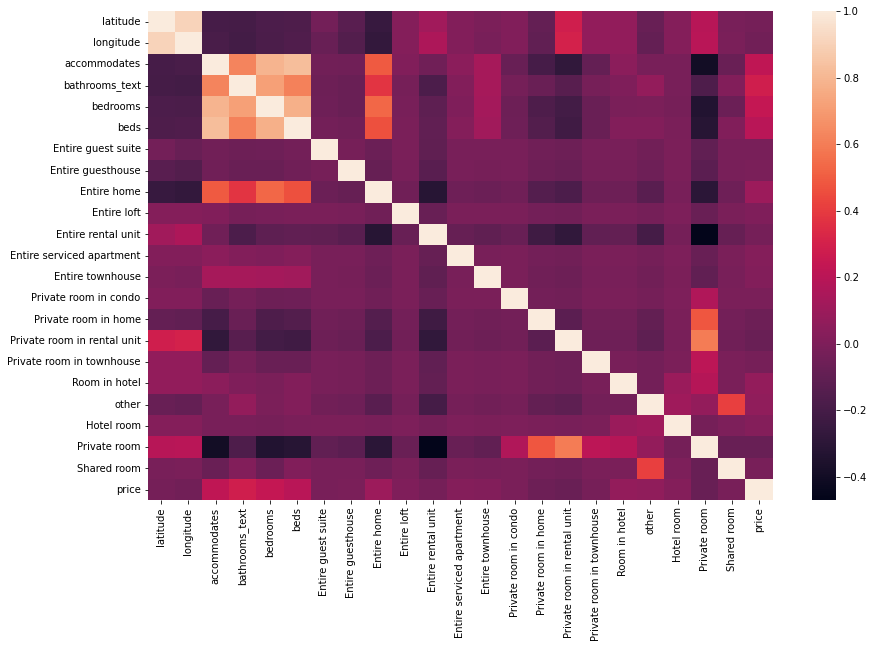

In [198]:
dims = (14, 9)
fig, ax = pyplot.subplots(figsize = dims)
sns.heatmap(US_final_scaled.corr(), ax = ax, xticklabels = True, yticklabels = True)
plt.show()

### I will also look individually at each pair of features to determine any correlation.

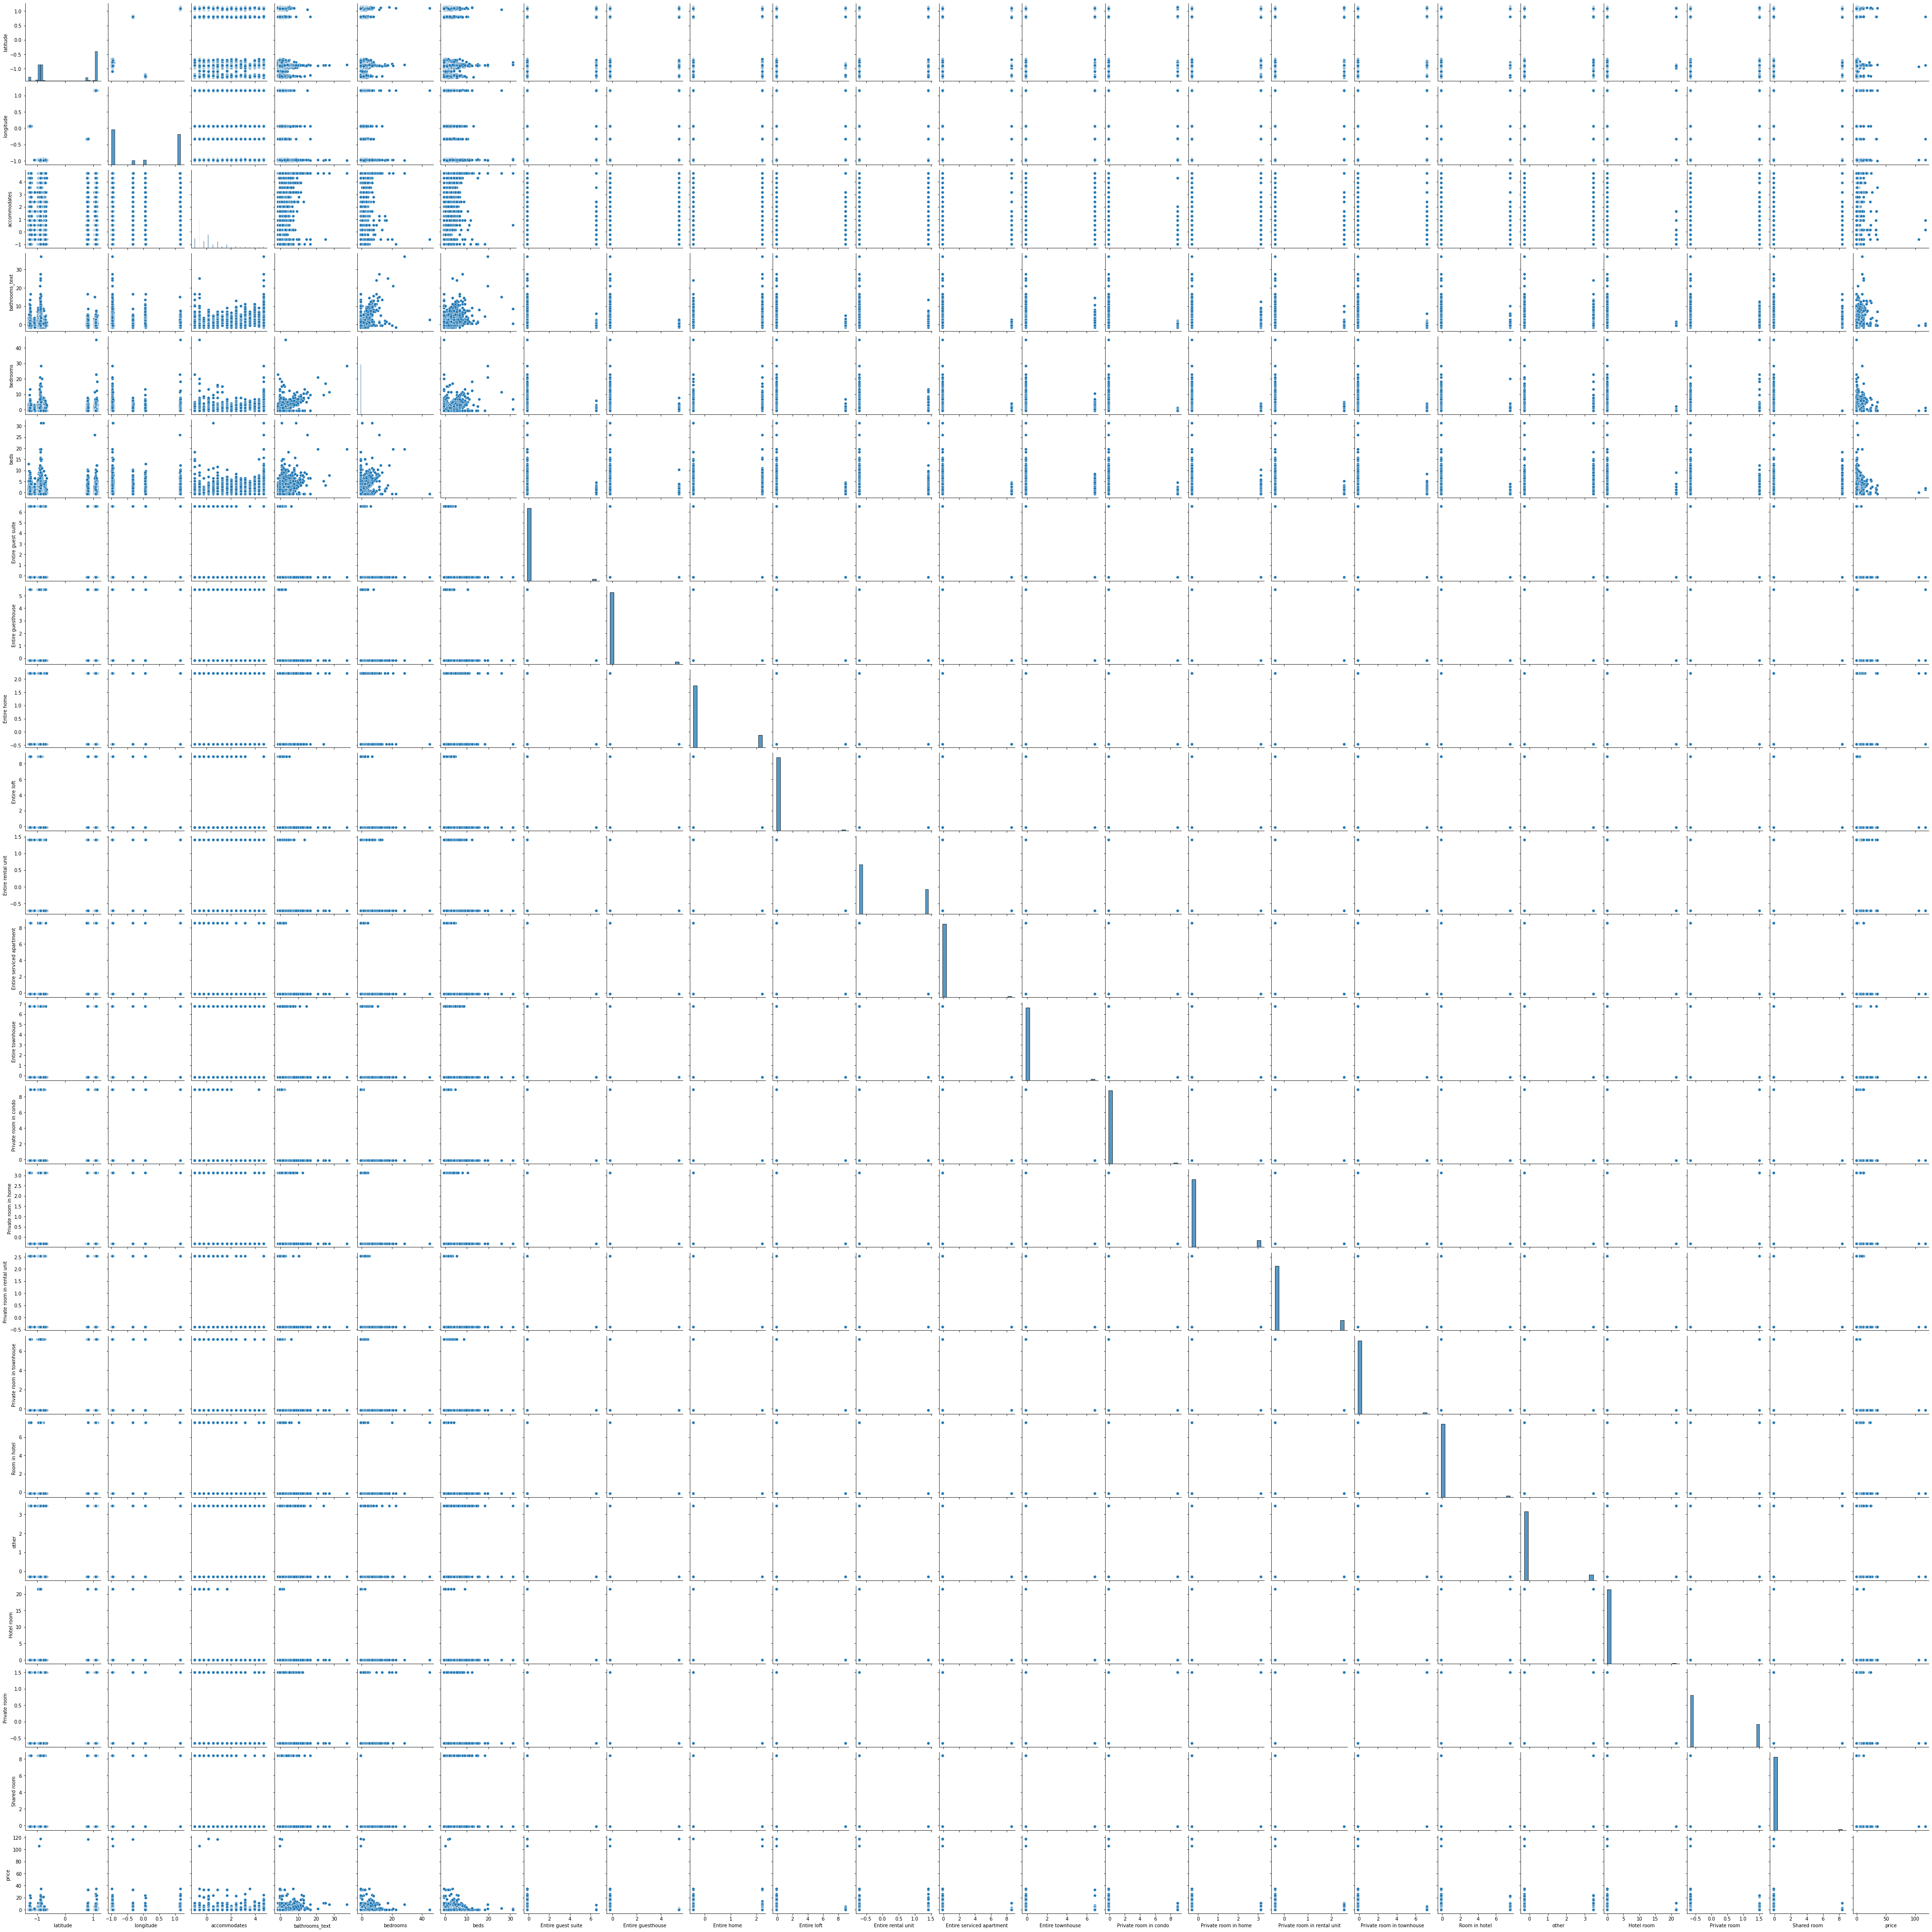

In [176]:
sns.pairplot(US_final_scaled)
plt.show()

### I also want to determine if any of the features have a large number of outliers so I will use create a boxplot for all the features.

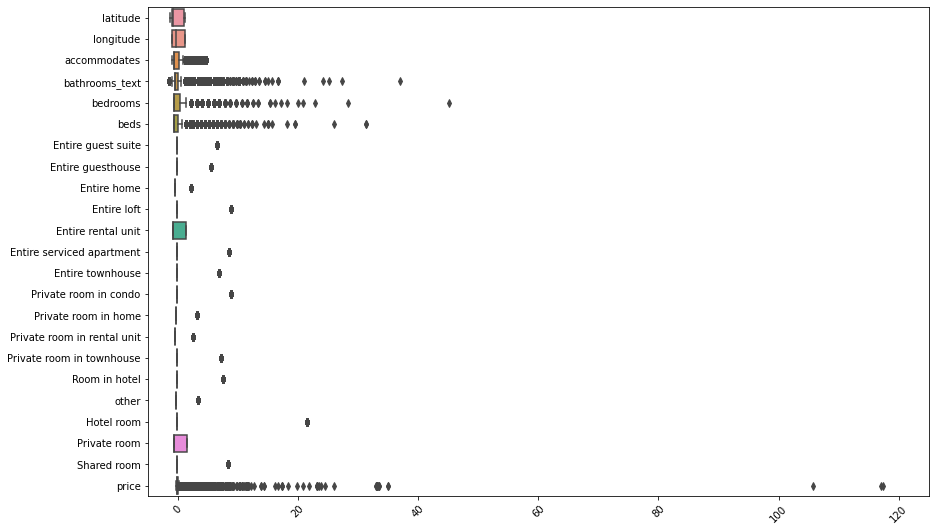

In [182]:
dims = (14, 9)
fig, ax = pyplot.subplots(figsize = dims)
sns.boxplot(data = US_final_scaled, ax = ax, orient = 'h', width = .8) 
ax.set_xlim(-5, 125)

plt.xticks(rotation = 45)

plt.show()

# Now to prepare the data for testing different machines.  I will create a training set of data and a testing set of data using the train_test_split tool.

In [193]:
X_Us = US_final_scaled.drop(columns = ['price'])
y_Us = US_final_scaled['price']

In [194]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Us, y_Us, test_size = .30, random_state = 50)